In [5]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchcam.methods import SmoothGradCAMpp, ScoreCAM
import torchvision.models as TM
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask
import numpy as np
import pandas as pd
import torchvision
import torch
import torch.utils.data as data
import torchvision.transforms as transforms
import get_image

In [6]:
image_dir = r'C:\AI_project\data\torch_imagenet\validation'
number_of_image = 10
image = get_image.get_image(number_of_image=number_of_image, image_dir=image_dir)

In [7]:
model = TM.resnet152(pretrained=True).eval()

0


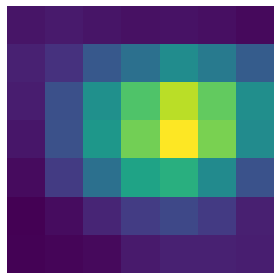

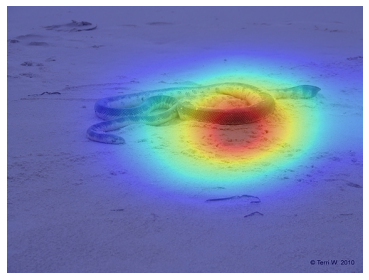

1


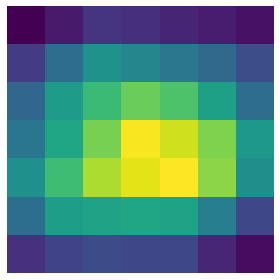

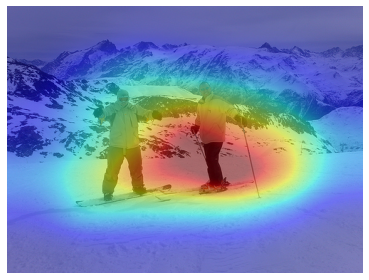

2


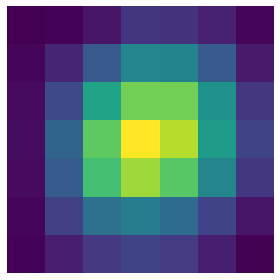

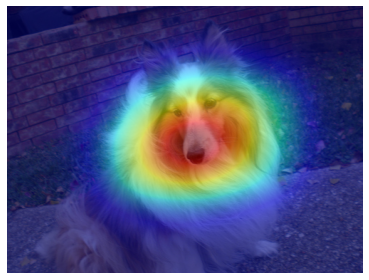

3


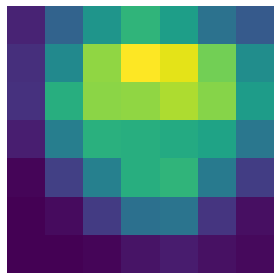

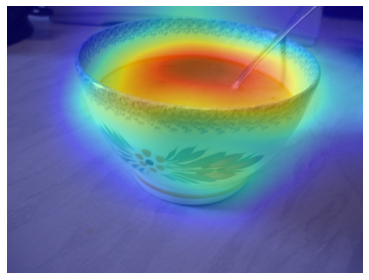

4


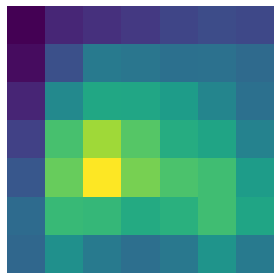

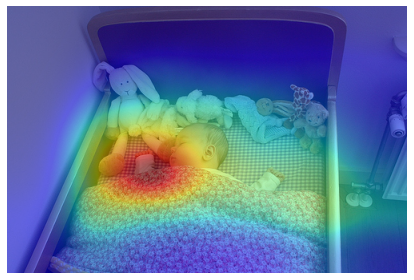

5


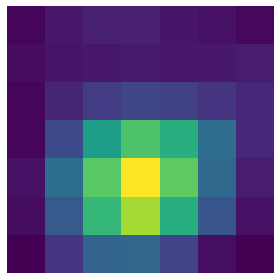

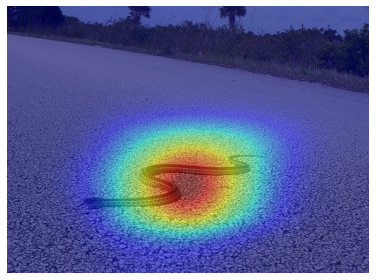

6


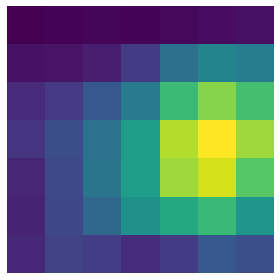

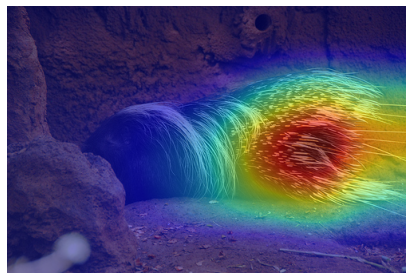

7


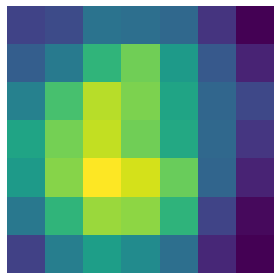

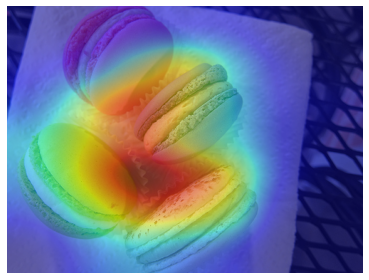

8


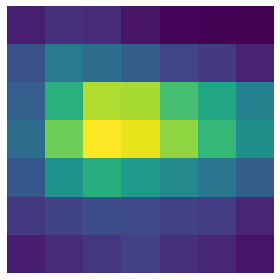

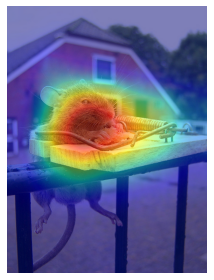

9


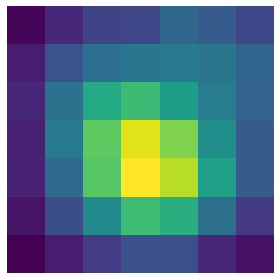

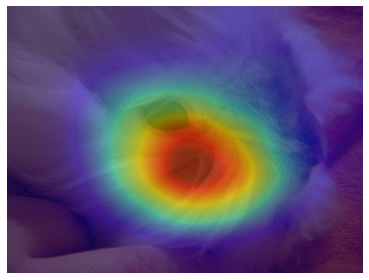

In [8]:
cam_extractor = SmoothGradCAMpp(model, target_layer= 'layer4')
arr = []
for i in range(number_of_image):
    print(i)
    img = read_image(image[i])
    input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    out=(model(input_tensor.unsqueeze(0)))
    # Retrieve the CAM by passing the class index and the model output
    activation_map=(cam_extractor(out.squeeze(0).argmax().item(), out))
    plt.imshow(activation_map[0].squeeze(0).numpy()); plt.axis('off'); plt.tight_layout(); plt.show()
    result = overlay_mask(to_pil_image(img), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
    plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()
    arr.append((torch.stack(activation_map,0)).numpy())

In [9]:
npy_dir = r'C:\AI_project\CAM_NAS_Without training\feature\resnet152_grad_training.npy'
numpy_arr = np.array(arr)
feature = np.squeeze(numpy_arr, axis=1)
np.save(file=npy_dir, arr=feature)